In [ ]:
!pip install tensorflow keras pandas numpy matplotlib gym empyrical

In [ ]:
!git clone https://github.com/Albert-Z-Guo/Deep-Reinforcement-Stock-Trading.git

Cloning into 'Deep-Reinforcement-Stock-Trading'...
remote: Enumerating objects: 766, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 766 (delta 98), reused 91 (delta 91), pack-reused 652
Receiving objects: 100% (766/766), 10.20 MiB | 16.50 MiB/s, done.
Resolving deltas: 100% (464/464), done.


In [ ]:
%cd Deep-Reinforcement-Stock-Trading

/content/Deep-Reinforcement-Stock-Trading


In [ ]:
!python train.py  --num_episode=1

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 10s 10s/step
^C


In [ ]:
#!python train.py --model_name=DQN --stock_name=^GSPC_2010-2015

In [ ]:
!python evaluate.py

2023-07-10 08:31:36.894936: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 08:31:39.721889: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
1/1 [==============================] - 0s 23ms/step
Figure(1600x800)


In [ ]:
!tensorboard --logdir=logs/model_events

2023-07-10 08:32:43.590472: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 08:32:44.615943: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.

In [ ]:
%cd /content/Deep-Reinforcement-Stock-Trading

/content/Deep-Reinforcement-Stock-Trading


In [ ]:
%ls

agents/      LICENSE       README.md         train.py
data/        logs/         requirements.txt  utils.py
evaluate.py  __pycache__/  saved_models/     visualizations/


In [ ]:
%cd visualizations/

/content/Deep-Reinforcement-Stock-Trading/visualizations


In [ ]:
!pip install yahoofinancials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.15-py3-none-any.whl size=28713 sha256=c2059f023f87f36e8ec07587f963c2481c350fcd224ca88daf123827a767d58e
  Stored in directory: /root/.cache/pip/wheels/06/9c/4b/0566bbb720cdf54370f921f20d259a26392099760a37827811
Successfully built yahoofinancials


# visualization

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from yahoofinancials import YahooFinancials
%matplotlib inline

In [ ]:
start_date = '2017-01-01'
end_date = '2017-12-31'
stock_code = 'NVDA'

In [ ]:
stock_data = YahooFinancials(stock_code).get_historical_price_data(start_date, end_date, 'daily')
price_data = stock_data[stock_code]['prices']

In [ ]:
columns = ['formatted_date', 'open', 'high', 'low', 'close', 'adjclose', 'volume']
new_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
# order dataframe columns
df = pd.DataFrame(data=price_data)[columns]
# rename dataframe columns
df = df.rename(index=str, columns=dict(zip(columns, new_columns)))

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,26.100000,26.592501,24.844999,25.502501,25.140350,150199600
1,2017-01-04,25.850000,26.375000,25.382500,26.097500,25.726902,119922000
2,2017-01-05,26.132500,26.455000,25.262501,25.434999,25.073811,98429600
3,2017-01-06,25.712500,26.062500,25.299999,25.775000,25.408981,82285600
4,2017-01-09,25.875000,27.000000,25.875000,26.820000,26.439140,91624800
5,2017-01-10,26.952499,27.297501,26.407499,26.617500,26.239515,88092000
6,2017-01-11,26.500000,26.549999,26.037500,26.290001,25.916670,52566400
7,2017-01-12,26.057501,26.174999,25.405001,25.860001,25.492771,62561600
8,2017-01-13,25.900000,26.250000,25.764999,25.857500,25.490307,45782000
9,2017-01-17,25.750000,25.799999,25.142500,25.277500,24.918541,58061200


In [ ]:
# save to 'data' directory
df.to_csv('../data/{}_{}.csv'.format(stock_code, start_date[:4]))

In [ ]:
df = pd.read_csv('../data/^GSPC_2016.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000
1,2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
2,2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
3,2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000
4,2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000
5,2016-01-11,1926.119995,1935.650024,1901.099976,1923.670044,1923.670044,4607290000
6,2016-01-12,1927.829956,1947.380005,1914.349976,1938.680054,1938.680054,4887260000
7,2016-01-13,1940.339966,1950.329956,1886.410034,1890.280029,1890.280029,5087030000
8,2016-01-14,1891.680054,1934.469971,1878.930054,1921.839966,1921.839966,5241110000
9,2016-01-15,1916.680054,1916.680054,1857.829956,1880.329956,1880.329956,5468460000


In [ ]:
df.shape

(252, 7)

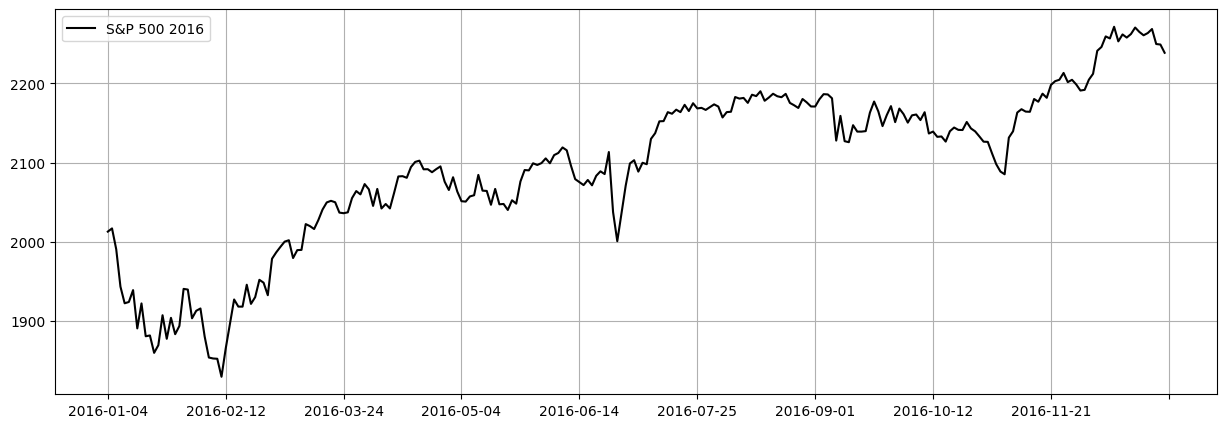

In [ ]:
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(df['Date'], df['Close'], color='black', label='S&P 500 2016')
plt.xticks(np.linspace(0, len(df), 10))
plt.legend()
plt.grid()

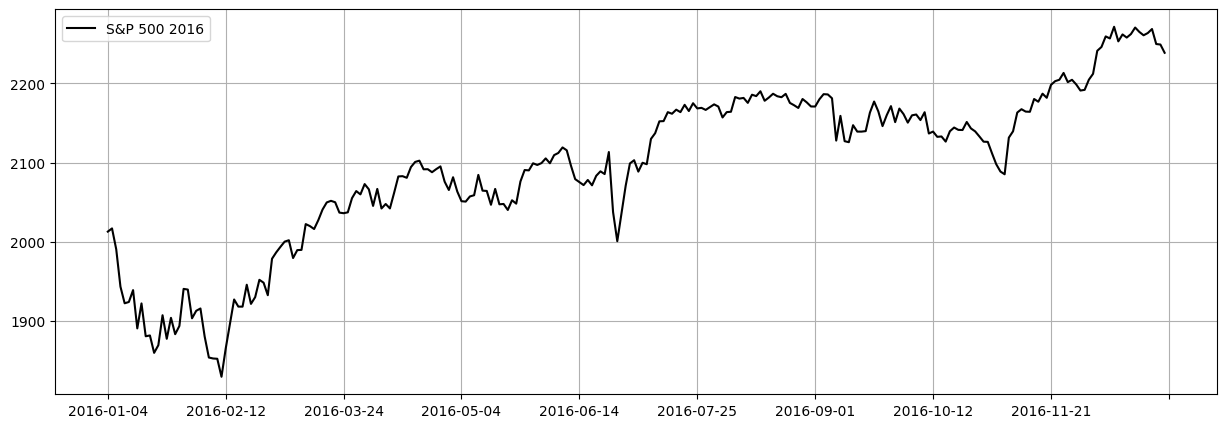

In [ ]:
fig = plt.figure(figsize=(15, 5), dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(df['Date'], df['Close'], color='black', label='S&P 500 2016')
ax.set_xticks(np.linspace(0, len(df), 10))
ax.legend()
ax.grid()

## pattern_identification

In [ ]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from statsmodels.nonparametric.kernel_regression import KernelReg
from yahoofinancials import YahooFinancials

In [ ]:
start_date = '2017-01-01'
end_date = '2017-12-31'
stock_code = 'AMZN' # e.g. AMZN, GOOG, FB, NVDA

In [ ]:
def preprocess_data(start_date, end_date, stock_code):
    stock_data = YahooFinancials(stock_code).get_historical_price_data(start_date, end_date, 'daily')
    price_data = stock_data[stock_code]['prices']
    columns = ['formatted_date', 'open', 'high', 'low', 'close', 'adjclose', 'volume']
    new_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    df = pd.DataFrame(data=price_data)[columns] # order dataframe columns
    df = df.rename(index=str, columns=dict(zip(columns, new_columns))) # rename dataframe columns
    return df, df['Close'], df['Date']

In [ ]:
df, prices, dates = preprocess_data(start_date, end_date, stock_code)

In [ ]:
# set the index from 1 for Nadaraya-Watson kernel regression
prices.index = np.linspace(1, len(prices), len(prices))
dates.index = np.linspace(1, len(dates), len(dates))

In [ ]:
dates.head()

1.0    2017-01-03
2.0    2017-01-04
3.0    2017-01-05
4.0    2017-01-06
5.0    2017-01-09
Name: Date, dtype: object

In [ ]:
prices.head()

1.0    37.683498
2.0    37.859001
3.0    39.022499
4.0    39.799500
5.0    39.846001
Name: Close, dtype: float64

In [ ]:
# https://onlinelibrary.wiley.com/doi/full/10.1111/0022-1082.00265
# reference: https://www.quantopian.com/posts/an-empirical-algorithmic-evaluation-of-technical-analysis
def find_max_min(prices):
    model = KernelReg(prices.values, prices.index.values, var_type='c', bw='cv_ls')
    smooth_prices = pd.Series(data=model.fit([prices.index.values])[0], index=prices.index) # index also from 1

    # use the minima and maxima from the smoothed timeseries
    # to identify true local minima and maxima in the original timeseres
    # by taking the maximum/minimum price within a t-1, t+1 window in the smoothed timeseries
    smooth_prices_max_indices = argrelextrema(smooth_prices.values, np.greater)[0]
    smooth_prices_min_indices = argrelextrema(smooth_prices.values, np.less)[0]

    price_max_indices = []
    for i in smooth_prices_max_indices:
        if 1 < i < len(prices)-1:
            price_max_indices.append(prices.iloc[i-2:i+2].idxmax())

    price_min_indices = []
    for i in smooth_prices_min_indices:
        if 1 < i < len(prices)-1:
            price_min_indices.append(prices.iloc[i-2:i+2].idxmin())

    price_max = prices.loc[price_max_indices]
    price_min = prices.loc[price_min_indices]
    max_min = pd.concat([price_max, price_min]).sort_index()
    max_min = max_min[~max_min.duplicated()] # deduplicate points that are both maximum and minimum
    max_min

    return smooth_prices, smooth_prices_max_indices, smooth_prices_min_indices, \
            price_max_indices, price_min_indices, max_min

In [ ]:
smooth_prices, smooth_prices_max_indices, smooth_prices_min_indices, \
            price_max_indices, price_min_indices, max_min = find_max_min(prices)

In [ ]:
print(len(max_min))
max_min.head()

105


5.0     39.846001
6.0     39.794998
9.0     40.856998
10.0    40.486000
11.0    40.374001
Name: Close, dtype: float64

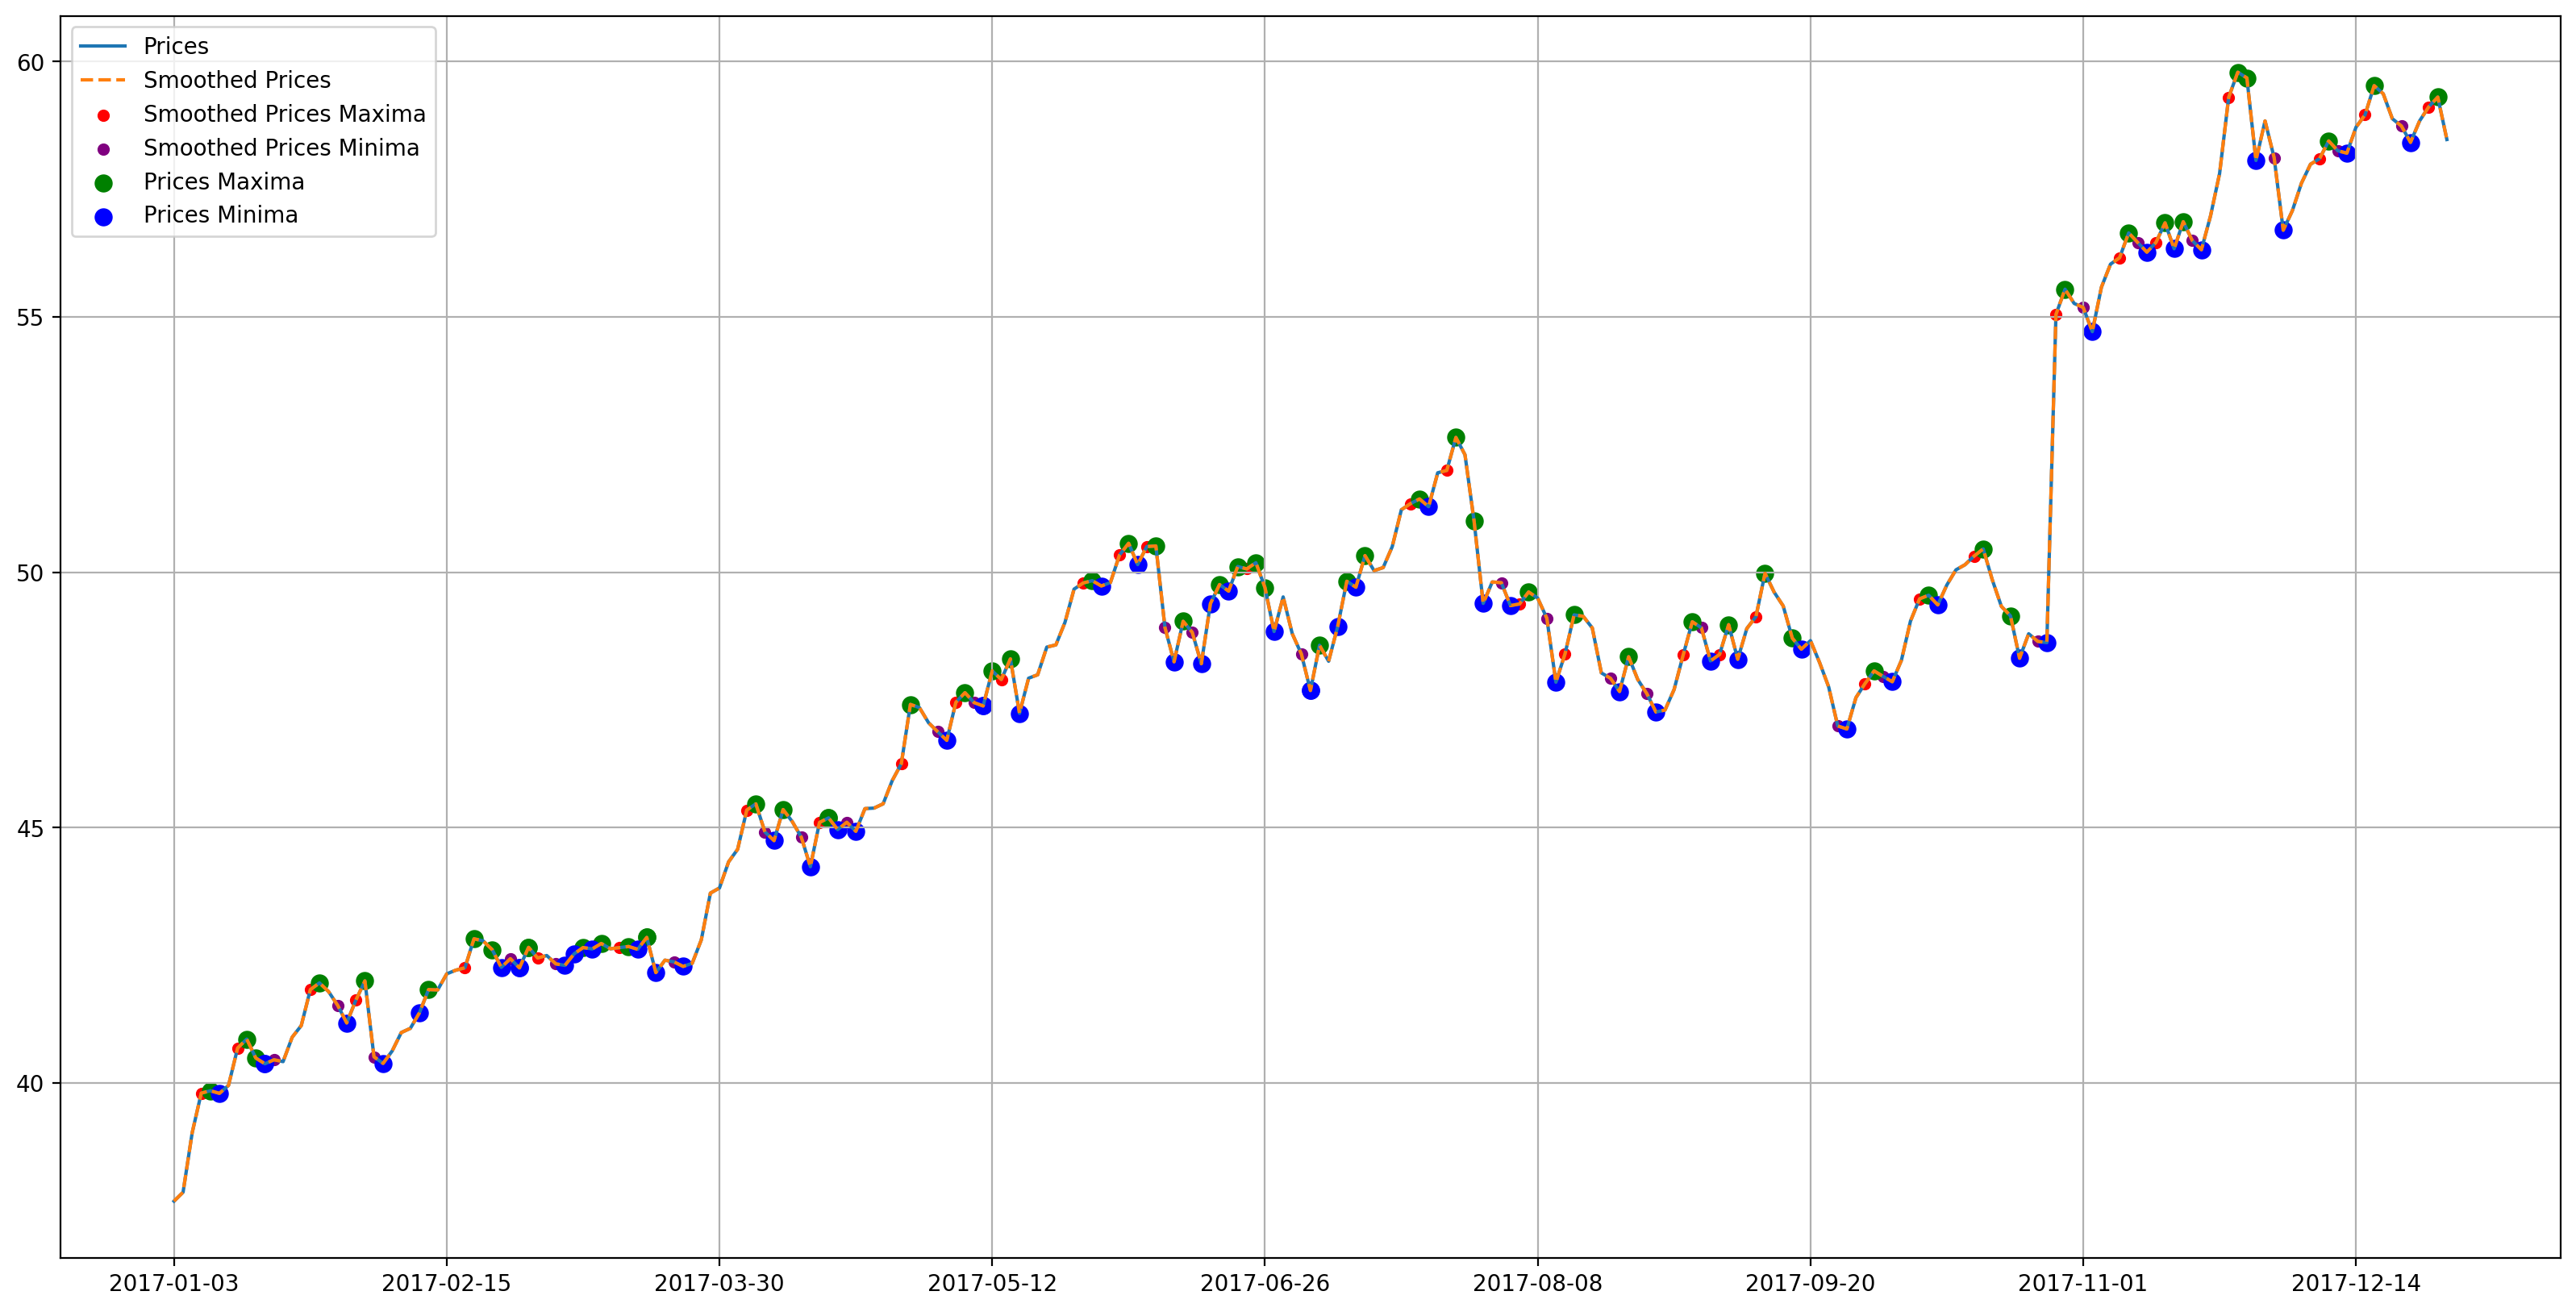

In [ ]:
fig, ax = plt.subplots(figsize=(20,10), dpi=200)

ax.plot(dates, prices, label='Prices')
ax.plot(dates, smooth_prices, label='Smoothed Prices', linestyle='dashed')
ax.set_xticks(np.arange(0, len(dates), 30))

smooth_prices_max = smooth_prices.loc[smooth_prices_max_indices]
smooth_prices_min = smooth_prices.loc[smooth_prices_min_indices]
price_max = prices.loc[price_max_indices]
price_min = prices.loc[price_min_indices]

ax.scatter(dates.loc[smooth_prices_max.index], smooth_prices_max.values, s=20, color='red', label='Smoothed Prices Maxima')
ax.scatter(dates.loc[smooth_prices_min.index], smooth_prices_min.values, s=20, color='purple', label='Smoothed Prices Minima')

ax.scatter(dates.loc[price_max.index], price_max.values, s=50, color='green', label='Prices Maxima')
ax.scatter(dates.loc[price_min.index], price_min.values, s=50, color='blue', label='Prices Minima')
ax.legend(loc='upper left')
ax.grid()

In [ ]:
def plot_window(dates, prices, smooth_prices,
                smooth_prices_max_indices, smooth_prices_min_indices,
                price_max_indices, price_min_indices,
                start, end, ax=None):
    if ax is None: fig, ax = plt.subplots(figsize=(20,10), dpi=200)

    ax.plot(dates.loc[start:end], prices.loc[start:end], label='Prices')
    ax.plot(dates.loc[start:end], smooth_prices.loc[start:end], label='Smoothed Prices', linestyle='dashed')
    ax.set_xticks(np.linspace(0, len(dates.loc[start:end]), 10))
    ax.tick_params(axis='x', rotation=45)

    smooth_prices_max = smooth_prices.loc[smooth_prices_max_indices].loc[start:end]
    smooth_prices_min = smooth_prices.loc[smooth_prices_min_indices].loc[start:end]
    price_max = prices.loc[price_max_indices].loc[start:end]
    price_min = prices.loc[price_min_indices].loc[start:end]

    ax.scatter(dates.loc[smooth_prices_max.index], smooth_prices_max.values, s=20, color='red', label='Smoothed Prices Maxima')
    ax.scatter(dates.loc[smooth_prices_min.index], smooth_prices_min.values, s=20, color='purple', label='Smoothed Prices Minima')

    ax.scatter(dates.loc[price_max.index], price_max.values, s=50, color='green', label='Prices Maxima')
    ax.scatter(dates.loc[price_min.index], price_min.values, s=50, color='blue', label='Prices Minima')
    ax.legend(fontsize='small')
    ax.grid()

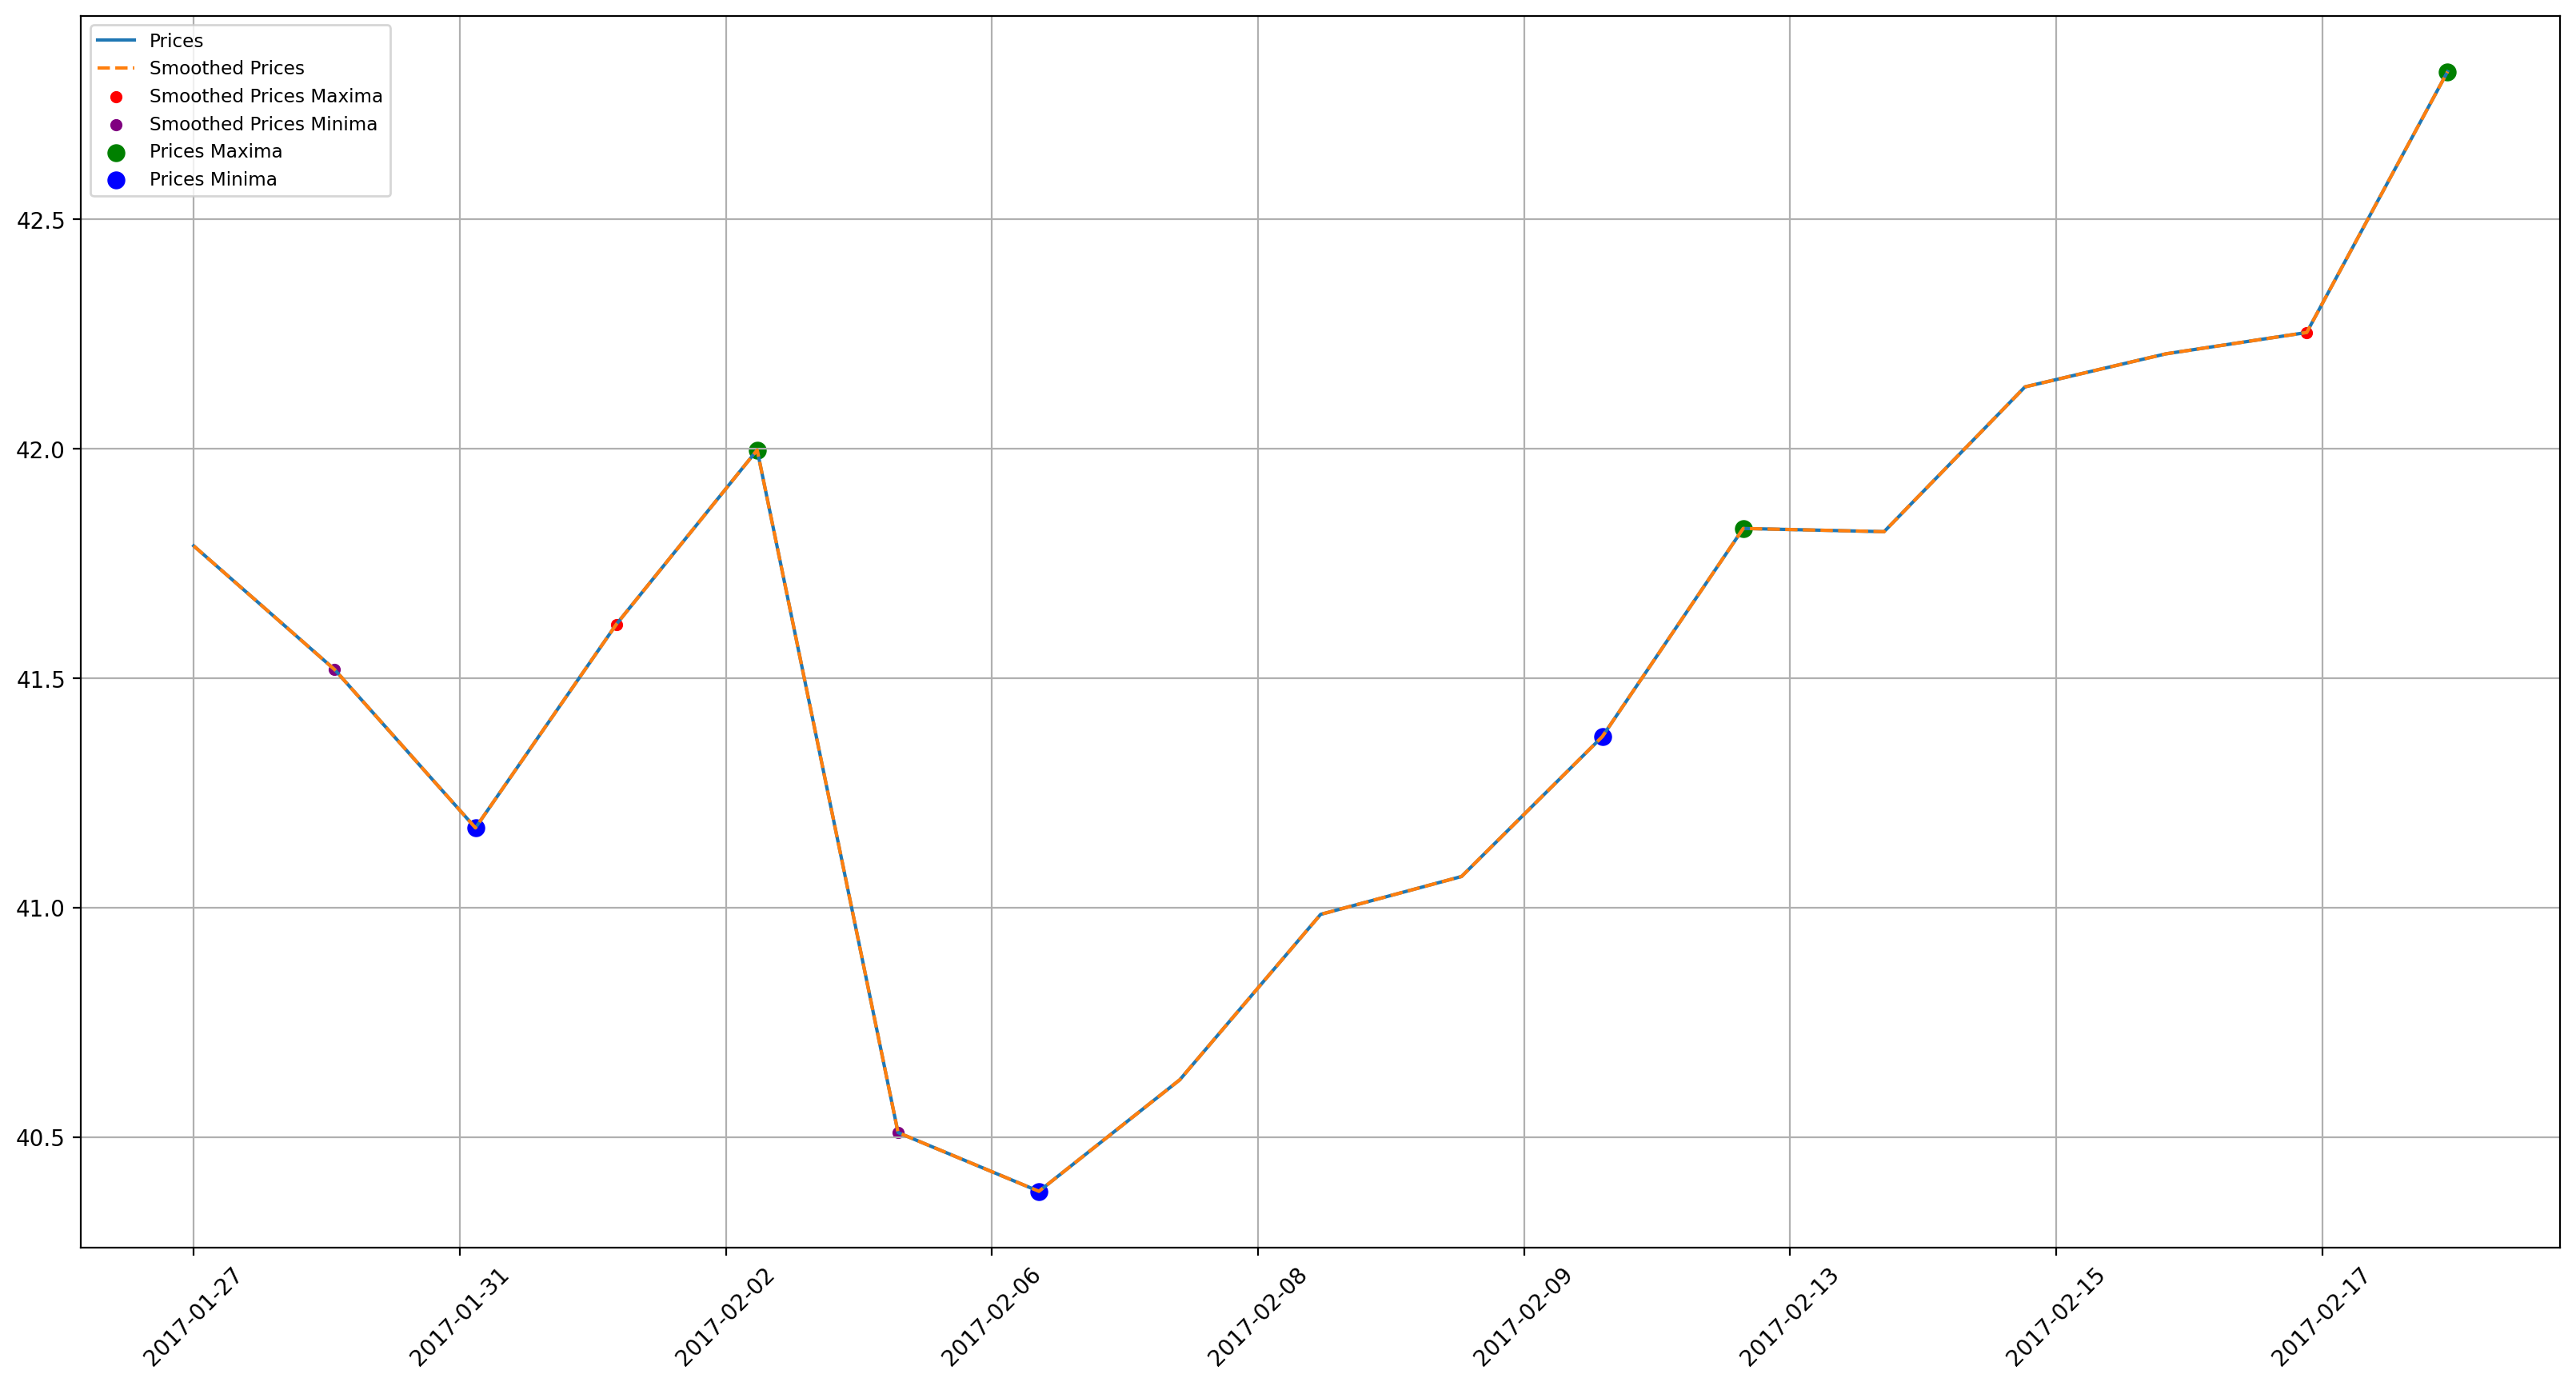

In [ ]:
plot_window(dates, prices, smooth_prices,
            smooth_prices_max_indices, smooth_prices_min_indices,
            price_max_indices, price_min_indices,
            start=18, end=34, ax=None)

In [ ]:
def find_patterns(max_min):
    patterns = defaultdict(list)

    for i in range(5, len(max_min)):
        window = max_min.iloc[i-5:i]

        # pattern must play out in less than 36 days
        if window.index[-1] - window.index[0] > 35:
            continue

        # Using the notation from the paper to avoid mistakes
        e1, e2, e3, e4, e5 = window.iloc[:5]
        rtop_g1 = np.mean([e1, e3, e5])
        rtop_g2 = np.mean([e2, e4])

        # Head and Shoulders
        if (e1 > e2) and (e3 > e1) and (e3 > e5) and \
            (abs(e1 - e5) <= 0.03*np.mean([e1,e5])) and \
            (abs(e2 - e4) <= 0.03*np.mean([e1,e5])):
                patterns['HS'].append((window.index[0], window.index[-1]))

        # Inverse Head and Shoulders
        elif (e1 < e2) and (e3 < e1) and (e3 < e5) and \
            (abs(e1 - e5) <= 0.03*np.mean([e1,e5])) and \
            (abs(e2 - e4) <= 0.03*np.mean([e1,e5])):
                patterns['IHS'].append((window.index[0], window.index[-1]))

        # Broadening Top
        elif (e1 > e2) and (e1 < e3) and (e3 < e5) and (e2 > e4):
            patterns['BTOP'].append((window.index[0], window.index[-1]))

        # Broadening Bottom
        elif (e1 < e2) and (e1 > e3) and (e3 > e5) and (e2 < e4):
            patterns['BBOT'].append((window.index[0], window.index[-1]))

        # Triangle Top
        elif (e1 > e2) and (e1 > e3) and (e3 > e5) and (e2 < e4):
            patterns['TTOP'].append((window.index[0], window.index[-1]))

        # Triangle Bottom
        elif (e1 < e2) and (e1 < e3) and (e3 < e5) and (e2 > e4):
            patterns['TBOT'].append((window.index[0], window.index[-1]))

        # Rectangle Top
        elif (e1 > e2) and (abs(e1-rtop_g1)/rtop_g1 < 0.0075) and \
            (abs(e3-rtop_g1)/rtop_g1 < 0.0075) and (abs(e5-rtop_g1)/rtop_g1 < 0.0075) and \
            (abs(e2-rtop_g2)/rtop_g2 < 0.0075) and (abs(e4-rtop_g2)/rtop_g2 < 0.0075) and \
            (min(e1, e3, e5) > max(e2, e4)):
            patterns['RTOP'].append((window.index[0], window.index[-1]))

        # Rectangle Bottom
        elif (e1 < e2) and (abs(e1-rtop_g1)/rtop_g1 < 0.0075) and \
            (abs(e3-rtop_g1)/rtop_g1 < 0.0075) and (abs(e5-rtop_g1)/rtop_g1 < 0.0075) and \
            (abs(e2-rtop_g2)/rtop_g2 < 0.0075) and (abs(e4-rtop_g2)/rtop_g2 < 0.0075) and \
            (max(e1, e3, e5) > min(e2, e4)):
            patterns['RBOT'].append((window.index[0], window.index[-1]))

    return patterns

In [ ]:
patterns = find_patterns(max_min)
patterns

defaultdict(list,
            {'HS': [(5.0, 11.0),
              (17.0, 28.0),
              (37.0, 45.0),
              (46.0, 52.0),
              (51.0, 57.0),
              (88.0, 94.0),
              (102.0, 109.0),
              (116.0, 121.0),
              (161.0, 172.0),
              (172.0, 180.0),
              (194.0, 204.0)],
             'TBOT': [(6.0, 17.0),
              (39.0, 46.0),
              (47.0, 53.0),
              (71.0, 82.0),
              (90.0, 102.0),
              (164.0, 173.0)],
             'IHS': [(20.0, 29.0), (67.0, 74.0), (160.0, 170.0)],
             'RBOT': [(44.0, 48.0), (45.0, 51.0)],
             'TTOP': [(48.0, 54.0), (68.0, 76.0), (144.0, 153.0)],
             'RTOP': [(65.0, 73.0), (216.0, 222.0)],
             'BTOP': [(220.0, 228.0)]})

In [ ]:
shorthand_fullname_dict = {'HS': 'Head and Shoulders',
                           'IHS': 'Inverse Head and Shoulders',
                           'BTOP': 'Broadening Top',
                           'BBOT': 'Broadening Bottom',
                           'TTOP': 'Triangle Top',
                           'TBOT': 'Triangle Bottom',
                           'RTOP': 'Rectangle Top',
                           'RBOT': 'Rectangle Bottom'
                          }

In [ ]:
def visualize_patterns(dates, prices, smooth_prices,
                       smooth_prices_max_indices, smooth_prices_min_indices,
                       price_max_indices, price_min_indices,
                       patterns, shorthand_fullname_dict):
    for name, end_day_nums in patterns.items():
        print('Pattern Identified: {} \nNumber of Observations: {}'.format(shorthand_fullname_dict[name], len(end_day_nums)))
        rows = int(np.ceil(len(end_day_nums)/2))
        fig, axes = plt.subplots(rows, 2, figsize=(20,5*rows), dpi=200)
        fig.subplots_adjust(hspace=0.5)
        axes = axes.flatten()
        i = 0
        for start_date, end_date in end_day_nums:
            plot_window(dates, prices, smooth_prices,
                smooth_prices_max_indices, smooth_prices_min_indices,
                price_max_indices, price_min_indices,
                start=start_date-1, end=end_date+1, ax=axes[i])
            i += 1
        plt.show()

In [ ]:
visualize_patterns(dates, prices, smooth_prices,
                       smooth_prices_max_indices, smooth_prices_min_indices,
                       price_max_indices, price_min_indices,
                       patterns, shorthand_fullname_dict)